In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [97]:
df = pd.read_csv("Gold Loan  (1).csv")

In [98]:
df = pd.read_csv("Gold Loan  (1).csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

train = df.iloc[:int(0.8*len(df))]
test  = df.iloc[int(0.8*len(df)):]

X_train = train.drop('GLD', axis=1)
y_train = train['GLD']

X_test = test.drop('GLD', axis=1)
y_test = test['GLD']


In [99]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
21,2008-01-02,1395.420044,89.349998,70.470001,16.618999,1.479991
60,2008-01-04,1370.180054,86.860001,81.059998,16.600000,1.567791
77,2008-01-05,1409.339966,83.989998,90.379997,15.994000,1.543400
109,2008-01-07,1284.910034,92.660004,114.589996,17.900000,1.587806
149,2008-01-10,1161.060059,85.970001,79.589996,12.330000,1.380796


In [28]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['Date'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0
year,0
month,0
day,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(2290, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2290 non-null   int64  
 1   SPX         2290 non-null   float64
 2   GLD         2290 non-null   float64
 3   USO         2290 non-null   float64
 4   SLV         2290 non-null   float64
 5   EUR/USD     2290 non-null   float64
 6   year        2290 non-null   int32  
 7   month       2290 non-null   int32  
 8   day         2290 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 134.3 KB


In [14]:
df.describe()

,Unnamed: 0,SPX,GLD,USO,SLV,EUR/USD,year,month,day
count,2290.00000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1144.50000,1654.315776,122.732875,31.842221,20.084997,1.283653,2012.724891,6.445415,15.528384
std,661.21038,519.111540,23.283346,19.523517,7.092566,0.131547,2.993271,3.523849,8.894475
min,0.00000,676.530029,70.000000,7.960000,8.850000,1.039047,2008.000000,1.000000,1.000000
25%,572.25000,1239.874969,109.725000,14.380000,15.570000,1.171313,2010.000000,3.000000,8.000000
50%,1144.50000,1551.434998,120.580002,33.869999,17.268500,1.303297,2013.000000,6.000000,15.500000
75%,1716.75000,2073.010070,132.840004,37.827501,22.882500,1.369971,2015.000000,10.000000,23.000000
max,2289.00000,2872.870117,184.589996,117.480003,47.259998,1.598798,2018.000000,12.000000,31.000000


<Axes: xlabel='SPX', ylabel='Count'>

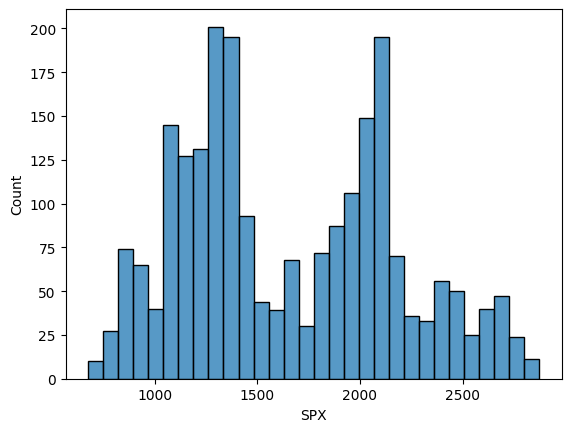

In [30]:
sns.histplot(df['SPX'],bins=30)

In [32]:
corr = df.corr()

<Axes: >

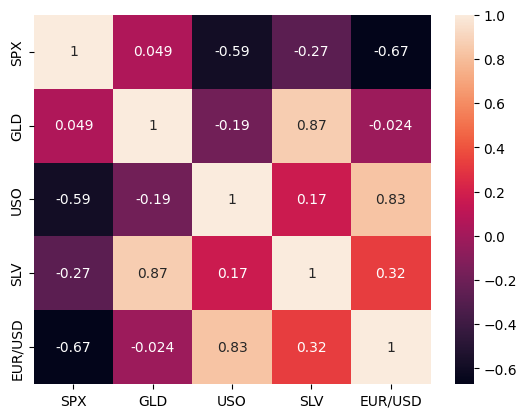

In [33]:
sns.heatmap(corr,annot=True)

In [38]:
# sns.barplot(x='SLV',y='GLD',hue='EUR/USD',data=df)

In [41]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [45]:
X = df.drop(columns=('GLD'),axis=1)
y = df['GLD']

In [46]:
from sklearn.model_selection import train_test_split


In [100]:
for d in [X_train, X_test]:
    d['year'] = d['Date'].dt.year
    d['month'] = d['Date'].dt.month

X_train.drop('Date', axis=1, inplace=True)
X_test.drop('Date', axis=1, inplace=True)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.linear_model import LinearRegression


In [103]:
model = LinearRegression()

In [104]:
model.fit(X_train,y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)

In [106]:
y_pred_train = model.predict(X_train)

In [107]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [108]:
r2_score(y_test,y_pred)


0.8975640982991402

In [109]:
r2_score(y_train,y_pred_train)

0.8771892526181604

In [110]:
from sklearn.tree import DecisionTreeRegressor


In [116]:


model_dt = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)


In [117]:
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

In [118]:
y_pred_dt_test = model_dt.predict(X_test)
y_pred_dt_train = model_dt.predict(X_train)

In [119]:
print(f"the testing accuracy is:- {r2_score(y_test,y_pred_dt_test)}")
print(f"the testing accuracy is:- {mean_absolute_error(y_test,y_pred_dt_test)}")
print(f"the testing accuracy is:- {mean_squared_error(y_test,y_pred_dt_test)}")

the testing accuracy is:- 0.9547753083258143
the testing accuracy is:- 3.4583488323788547
the testing accuracy is:- 24.796693726470675


In [120]:
print(f"the training accuracy is:- {r2_score(y_train,y_pred_dt_train)}")
print(f"the training  accuracy is:- {mean_absolute_error(y_train,y_pred_dt_train)}")
print(f"the training  accuracy is:- {mean_squared_error(y_train,y_pred_dt_train)}")

the training accuracy is:- 0.9652735266291413
the training  accuracy is:- 3.1426464271752206
the training  accuracy is:- 18.756820043615935


In [122]:
import pickle as pkl

with open("goldloan.pkl", "wb") as fs:
    pkl.dump(model_dt, fs)